In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/ivan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ivan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ivan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import english_words
from english_words import english_words_set

In [3]:
from nltk.stem import PorterStemmer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [4]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [5]:
#Format to CSV and remove unneeded information
from string import punctuation
outFileName = 'CountNewsOut.csv'
with open('CountNewsOut') as infile, open(outFileName, 'w') as outfile:
    outfile.write("occurrences,word\n")
    for line in infile:
        word = line.split(',', 1)[1]
        word.strip()
        if not any(i.isdigit() for i in word) and not any(p in word for p in punctuation): #and lemmatizer.lemmatize(word) in english_words_set:# in english_words_set:
            outfile.write(line)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv(outFileName, sep=',')
df["rank"] = range(len(df), 0, -1)
print(df)

       occurrences         word   rank
0                1       felson  86822
1                1       beeped  86821
2                1     dierksen  86820
3                1       jtsiao  86819
4                1   distrotion  86818
...            ...          ...    ...
86817       101530          and      5
86818       107310            a      4
86819       116233           of      3
86820       129475           to      2
86821       257240          the      1

[86822 rows x 3 columns]


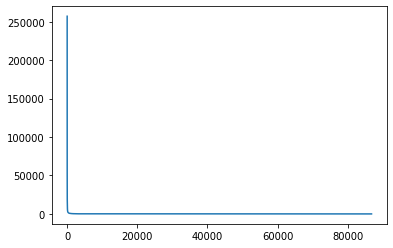

In [8]:
plt.plot(df["rank"], df["occurrences"])

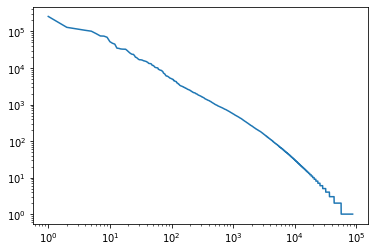

In [9]:
plt.loglog(df["rank"], df["occurrences"])

In [10]:
#df['word_correct'] = df['word'].apply(lambda x: lemma.lemmatize(y) for y in )
df['word_correct'] = df["word"].apply(lemmatize_text)
df = df[df['word'].isin(english_words_lower_set)]
df.to_csv("lemmatized_words.csv")
print(df['word_correct'])

NameError: name 'english_words_lower_set' is not defined

In [ ]:
stop_words = set(stopwords.words('english'))
print(df.keys())
print("HOLAAAA")
#df = df.drop(df.index[df['word'] in stop_words], inplace = True)
print(len(df))
df['word'] = df['word'].str.lower()
#df = df[~df['word'].isin(stop_words)]


#print(len(df[~df['word'].isin(stop_words)]))

In [ ]:
plt.loglog(df["rank"], df["occurrences"])


In [ ]:
print(len(df))